<h1><center>Titanic Classification</center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

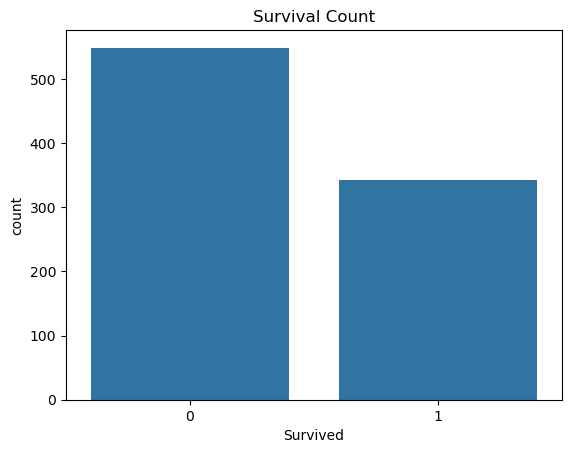

In [5]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df.drop('Cabin', axis=1, inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df[['Sex', 'Embarked']].head()

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


In [10]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
y_pred = model.predict(X_test_scaled)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



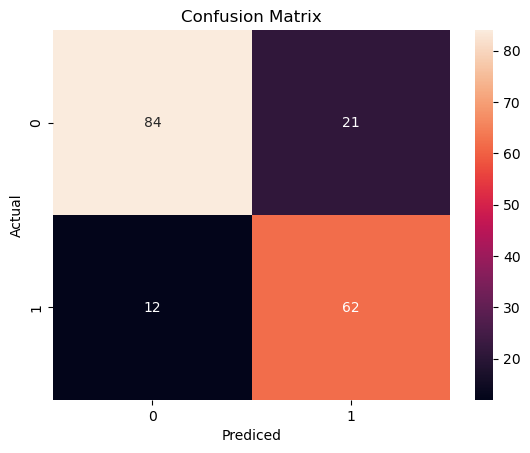

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediced')
plt.ylabel('Actual')
plt.show()

In [15]:
y_test.value_counts(normalize=True)

Survived
0    0.586592
1    0.413408
Name: proportion, dtype: float64

In [16]:
new_passenger = np.array([[3, 1, 25, 0, 0, 7.25, 0]])
new_passenger_scaled = scaler.transform(new_passenger)
prediction = model.predict(new_passenger_scaled)
print('Survived' if prediction[0] == 1 else 'Did not survive')

Survived


C:\Users\ASUS CORE I5\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
#Feature Engineering 👇

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

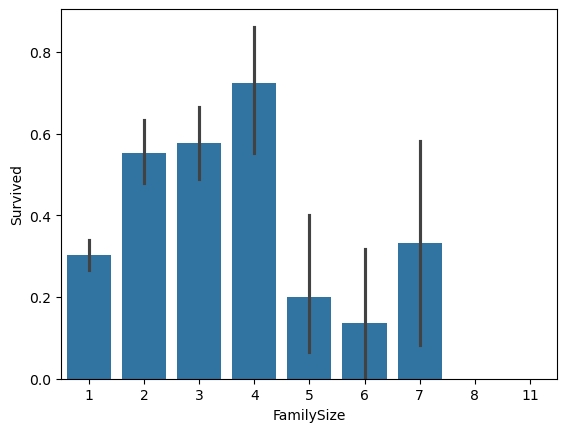

In [18]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

In [19]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model_2 = LogisticRegression(class_weight='balanced')
model_2.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = model_2.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_pred, y_test))
# 0.8156424581005587
print(classification_report(y_pred, y_test))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.82      0.75      0.79        81

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



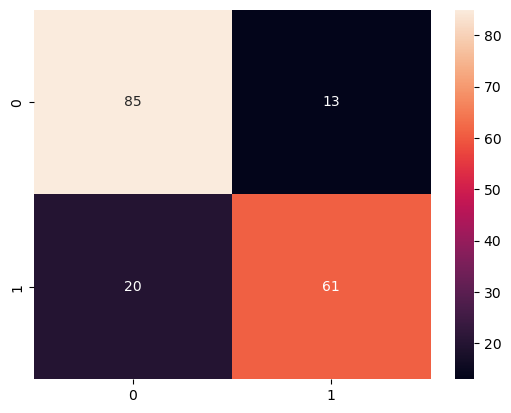

In [23]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d')
plt.show()

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,W./C. 6607,23.4500,0,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,1,1


In [25]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [26]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [27]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

In [28]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

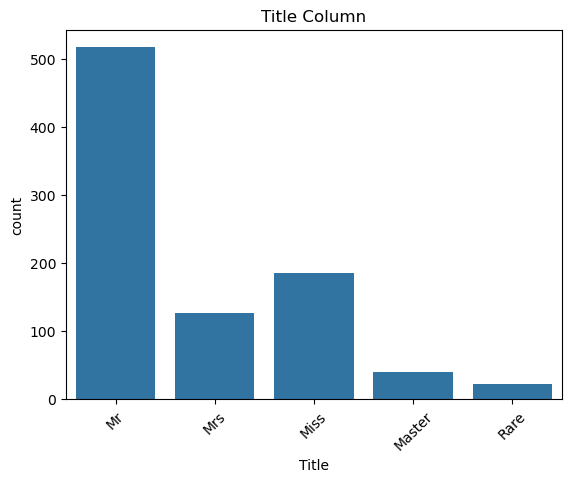

In [29]:
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)
plt.title('Title Column')
plt.show()

In [30]:
df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [42]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model_3 = LogisticRegression(class_weight='balanced')
model_3.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
y_pred = model_3.predict(X_test_scaled)
print('Accuracy score:', accuracy_score(y_pred, y_test))

Accuracy score: 0.7932960893854749


In [51]:
print('Classification Report:\n', classification_report(y_pred, y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.78      0.73      0.76        79

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



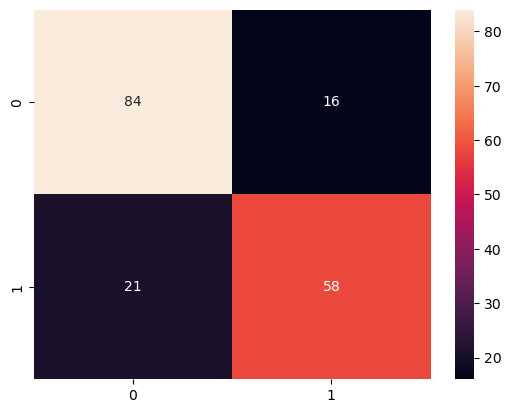

In [52]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d')
plt.show()

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,0,1,4
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,W./C. 6607,23.4500,0,4,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,1,1,0


In [53]:
df[['Title', 'Sex', 'Age', 'Pclass']].corr()

,Title,Sex,Age,Pclass
Title,1.000000,0.502713,-0.091211,-0.173929
Sex,0.502713,1.000000,-0.081163,-0.131900
Age,-0.091211,-0.081163,1.000000,-0.339898
Pclass,-0.173929,-0.131900,-0.339898,1.000000
